# Importing data and pacakge

In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import numpy as np

In [42]:
df = pd.read_csv('data/Electric_Vehicle_Charging_Stations.csv')
df


,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,7021565,6.74,0.00,0015-10-01 16:31:18,0015-10-01 19:59:08,16,19,3.463889,Thu,ios,...,0,2,0,0,0,1,0,0,0,1
3391,3758092,6.86,0.00,0015-10-02 16:28:48,0015-10-02 19:27:05,16,19,2.971389,Fri,ios,...,0,2,0,0,0,0,1,0,0,1
3392,5858374,6.07,0.00,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.495556,Wed,android,...,0,3,0,0,1,0,0,0,0,1
3393,2586645,5.74,0.00,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.202778,Thu,ios,...,1,2,0,0,0,1,0,0,0,1


In [43]:
df.columns

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')

In [14]:
df.dtypes


sessionId           int64
kwhTotal          float64
dollars           float64
created            object
ended              object
startTime           int64
endTime             int64
chargeTimeHrs     float64
weekday            object
platform           object
distance          float64
userId              int64
stationId           int64
locationId          int64
managerVehicle      int64
facilityType        int64
Mon                 int64
Tues                int64
Wed                 int64
Thurs               int64
Fri                 int64
Sat                 int64
Sun                 int64
reportedZip         int64
dtype: object

# Data Cleaning and Preprocessing

## 1. Converting data and time fields to python datetime ##
* 'created' and 'ended' 
* The year column in the time is wrong i.e. "0014-11-18 15:40:26" should actually be 2014 rather than 0014 (Also for 0015 as well)

In [44]:
df['created'] = df['created'].str.replace('0014','2014')
df['created'] = df['created'].str.replace('0015','2015')

df['ended'] = df['ended'].str.replace('0014','2014')
df['ended'] = df['ended'].str.replace('0015','2015')

df['created'] = pd.to_datetime(df['created'])
df['ended'] = pd.to_datetime(df['ended'])

In [45]:
df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,2014-11-18 15:40:26,2014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,2014-11-19 17:40:26,2014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,2014-11-21 12:05:46,2014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,2014-12-03 19:16:12,2014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,2014-12-11 20:56:11,2014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [46]:
#check to see if 'created' and 'ended' is datetime64
df.dtypes

sessionId                  int64
kwhTotal                 float64
dollars                  float64
created           datetime64[ns]
ended             datetime64[ns]
startTime                  int64
endTime                    int64
chargeTimeHrs            float64
weekday                   object
platform                  object
distance                 float64
userId                     int64
stationId                  int64
locationId                 int64
managerVehicle             int64
facilityType               int64
Mon                        int64
Tues                       int64
Wed                        int64
Thurs                      int64
Fri                        int64
Sat                        int64
Sun                        int64
reportedZip                int64
dtype: object

## 2. Check for missing values
* 'distance' is the distance from a user's home to the charging location, expressed in miles except where user did not report address
* We see from below that the only column that has missing/null values is the column 'distance' which is expected as this is a user-reported data. We have a few ways to go at this:
    1. leave as-is
    2. fill with placeholder 
    3. impute values 
        * mean/median imputation
        * model based imputation 
    4. remove entries 

For now I will choose to leave as-is because it's not critical for my primary analysis/simluations. This avoids introducing potential biases. 

In [11]:
df.isnull().sum()

sessionId            0
kwhTotal             0
dollars              0
created              0
ended                0
startTime            0
endTime              0
chargeTimeHrs        0
weekday              0
platform             0
distance          1065
userId               0
stationId            0
locationId           0
managerVehicle       0
facilityType         0
Mon                  0
Tues                 0
Wed                  0
Thurs                0
Fri                  0
Sat                  0
Sun                  0
reportedZip          0
dtype: int64

# EDA 

In [12]:
print(df.describe())

          sessionId     kwhTotal      dollars                        created  \
count  3.395000e+03  3395.000000  3395.000000                           3395   
mean   5.487001e+06     5.809629     0.118268  2015-07-10 18:31:25.943446272   
min    1.004821e+06     0.000000     0.000000            2014-11-18 15:01:17   
25%    3.234666e+06     4.350000     0.000000     2015-05-28 12:11:46.500000   
50%    5.451498e+06     6.230000     0.000000            2015-07-24 10:17:50   
75%    7.746644e+06     6.830000     0.000000     2015-09-01 11:03:32.500000   
max    9.998981e+06    23.680000     7.500000            2015-10-04 12:44:59   
std    2.590657e+06     2.892727     0.492562                            NaN   

                               ended    startTime      endTime  chargeTimeHrs  \
count                           3395  3395.000000  3395.000000    3395.000000   
mean   2015-07-10 21:21:55.298969088    13.743446    16.455965       2.841488   
min              2014-11-18 17:11:04

Histogram for distribution of key metrics for 'kwhTotal' and 'chargeTimeHrs'

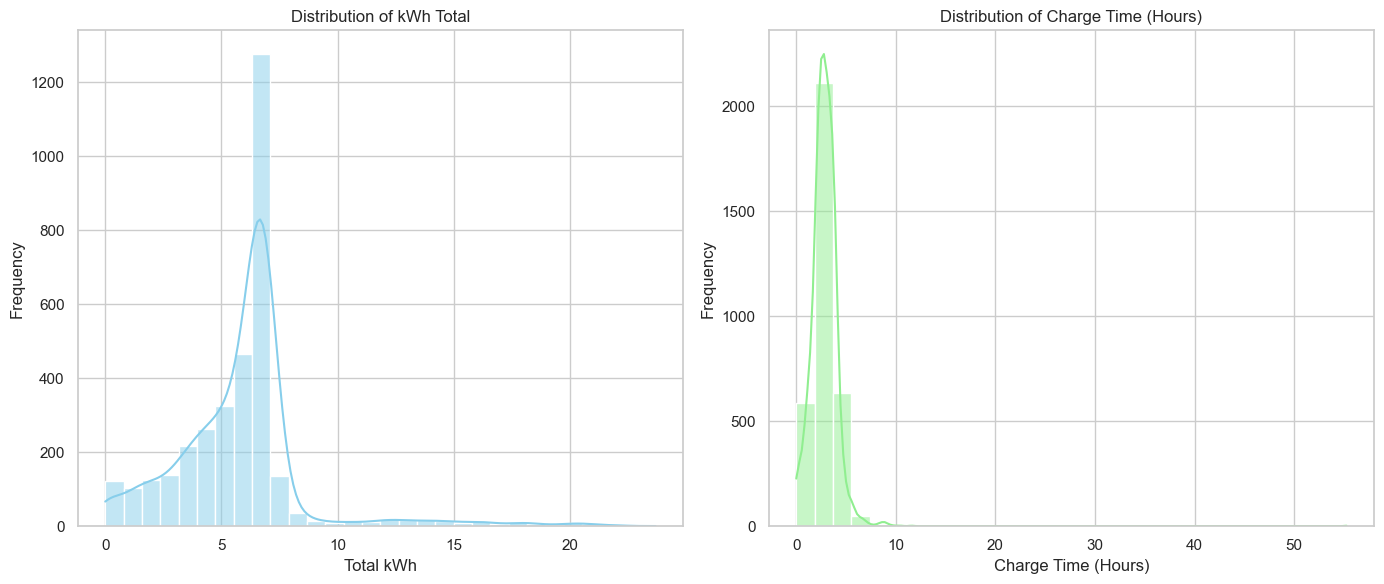

<Figure size 640x480 with 0 Axes>

In [39]:
# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram of total kWh used
sns.histplot(data=df, x='kwhTotal', bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of kWh Total')
axes[0].set_xlabel('Total kWh')
axes[0].set_ylabel('Frequency')

# Histogram of charge time in hours
sns.histplot(data=df, x='chargeTimeHrs', bins=30, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title('Distribution of Charge Time (Hours)')
axes[1].set_xlabel('Charge Time (Hours)')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Time Series Trends 
* how 'kwhTotal' trends over time 

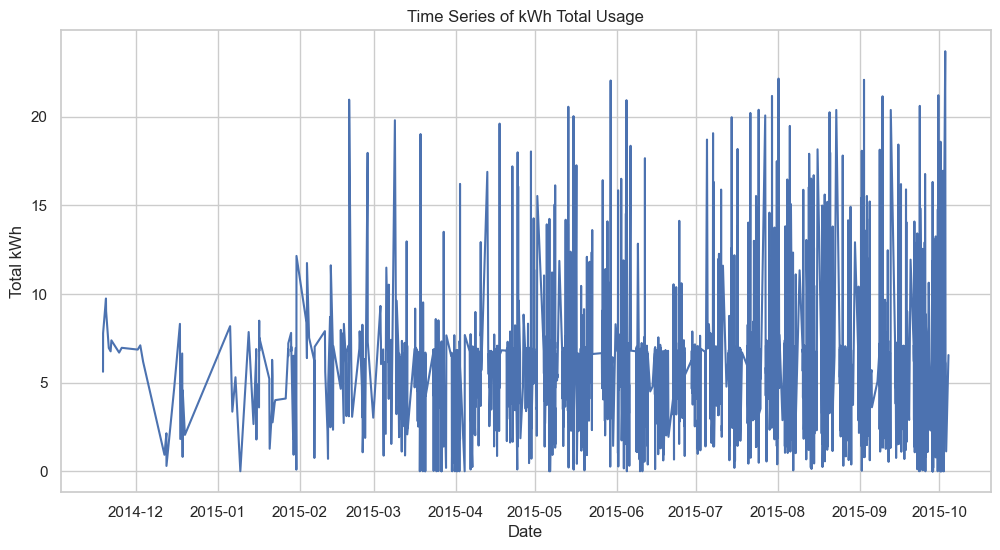

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='created', y='kwhTotal', data=df)
plt.title('Time Series of kWh Total Usage')
plt.xlabel('Date')
plt.ylabel('Total kWh')
plt.show()

Boxplots by Day of the Week
* compare distributions of 'kwhTotal' across days of the week using a boxplot

/var/folders/qp/zdchr9jd5bbbsdf_rff4w2300000gn/T/ipykernel_53125/1519340731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='kwhTotal', data=df, palette="coolwarm")


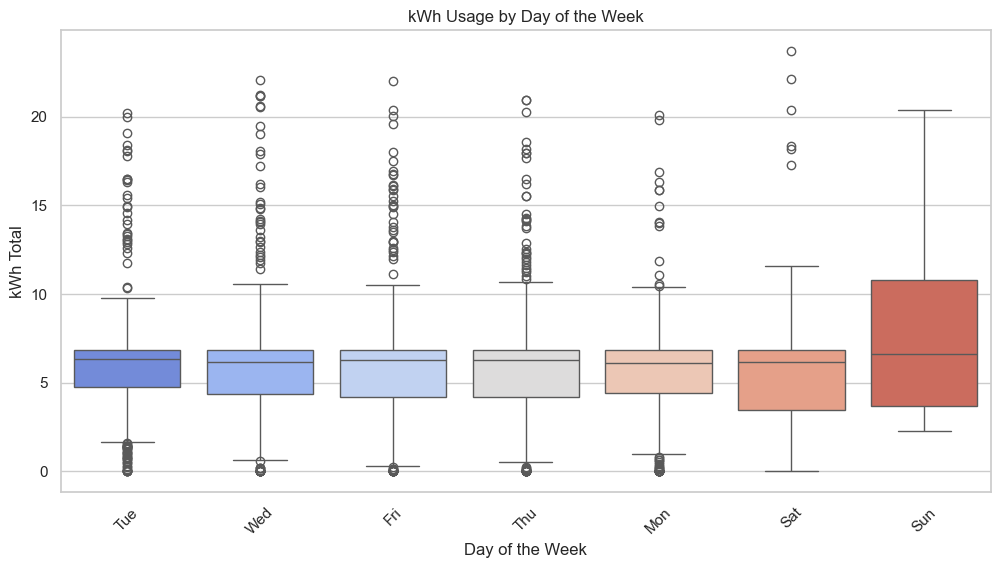

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='kwhTotal', data=df, palette="coolwarm")
plt.title('kWh Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('kWh Total')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


Correlation Heatmap
* Examine the correlation between numeric features.


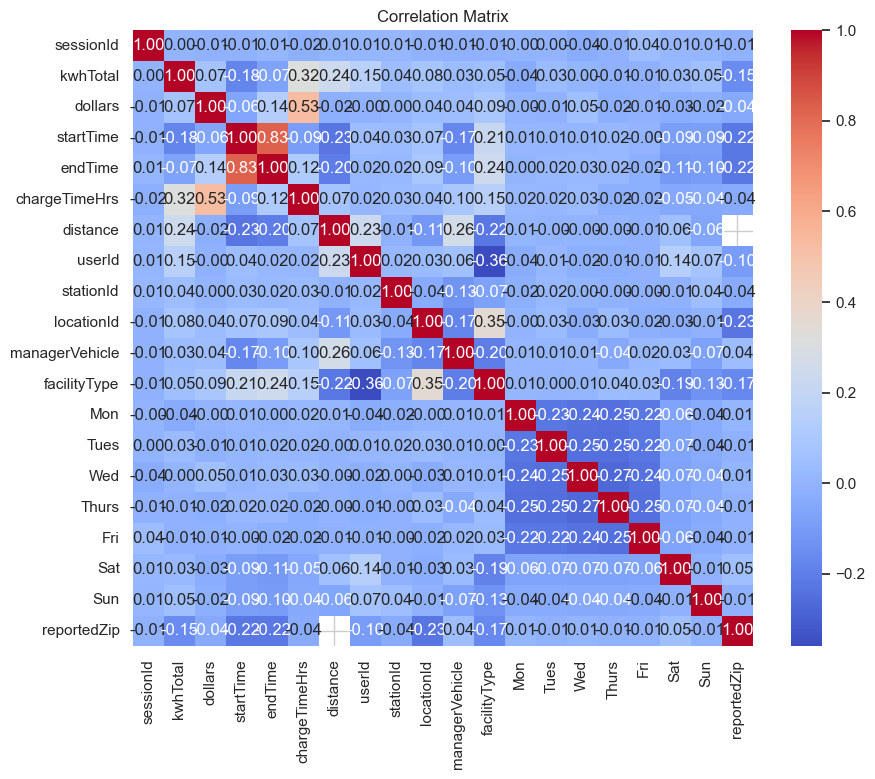

In [33]:

corr = df.select_dtypes(include=[np.number]).corr()  # Only select numeric columns

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

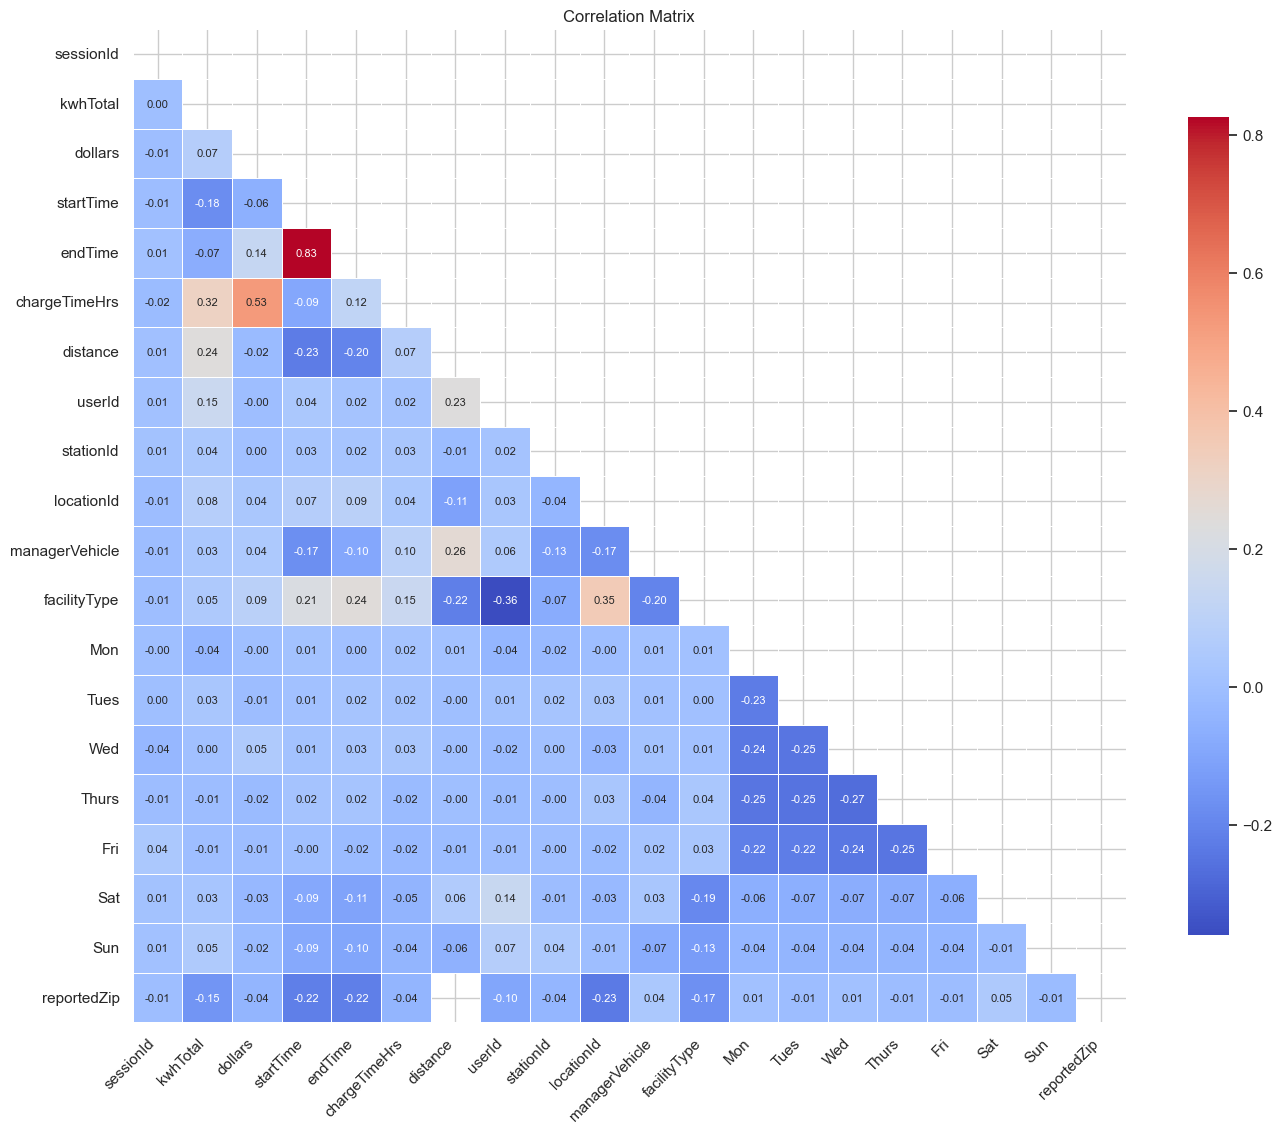

In [36]:
corr = df.select_dtypes(include=[np.number]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


____

In [49]:
df.dtypes

sessionId                  int64
kwhTotal                 float64
dollars                  float64
created           datetime64[ns]
ended             datetime64[ns]
startTime                  int64
endTime                    int64
chargeTimeHrs            float64
weekday                   object
platform                  object
distance                 float64
userId                     int64
stationId                  int64
locationId                 int64
managerVehicle             int64
facilityType               int64
Mon                        int64
Tues                       int64
Wed                        int64
Thurs                      int64
Fri                        int64
Sat                        int64
Sun                        int64
reportedZip                int64
dtype: object

In [50]:
#Save finalized df
df.to_csv('data/cleaned_df.csv', index = False)